In [ ]:
%cd '/content/drive/MyDrive/파이썬 데이터 분석 실무 테크닉 100/1장'

/content/drive/MyDrive/파이썬 데이터 분석 실무 테크닉 100/1장


# 1장. 웹에서 주문 수를 분석하는 테크닉 10
- 목적: 쇼핑몰 사이트의 상품 주문 수의 추세를 분석함으로써 판매량 개선의 방향을 찾는다.
- 데이터 설명(쇼핑몰의 주요 품목은 컴퓨터)
    - customer_master.csv: 쇼핑몰 사이트의 고객 정보로, 회원 등록 시 입력한 정보임. 이름, 성별 등.
    - item_master.csv: 취급하는 상품 데이터로, 상품명과 가격이 포함됨.
    - transaction_1.csv, transaction_2.csv: 구매내역 데이터로, 언제, 어느 고객이 얼마나 샀는지의 정보 포함.
    - transaction_detail_1.csv, transaction_detail_2.csv: 구매내역 상세 데이터로, 구체적으로 어떤 상품을 몇 개 샀는지의 정보를 포함.

### 테크닉1: 데이터를 읽어 들이자

In [ ]:
import pandas as pd
customer_master = pd.read_csv('customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [ ]:
item_master = pd.read_csv('item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [ ]:
transaction_1 = pd.read_csv('transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [ ]:
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


### 테크닉2: 데이터를 결합(유니언)해 보자
- 데이터를 어떻게 가공할 지는 분석의 목적에 따라 다르다. 여기서는 transaction_detail을 기준으로 한다.
- 세로 방향 결합하기

In [ ]:
transaction_2 = pd.read_csv('transaction_2.csv')
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [ ]:
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [ ]:
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv')
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


pd.concat의 ignore_index 옵션
- False일 경우 기존 index를 유지한다.
- True일 경우 기존 index를 무시한다.

In [ ]:
df_1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
'B': ['B0', 'B1', 'B2'],
'C': ['C0', 'C1', 'C2'],
'D': ['D0', 'D1', 'D2']},
index=['r0', 'r1', 'r2'])

df_1.head()

,A,B,C,D
r0,A0,B0,C0,D0
r1,A1,B1,C1,D1
r2,A2,B2,C2,D2


In [ ]:
df_2 = pd.DataFrame({'A': ['A3', 'A4', 'A5'],
'B': ['B3', 'B4', 'B5'],
'C': ['C3', 'C4', 'C5'],
'D': ['D3', 'D4', 'D5']},
index=['r3', 'r4', 'r5'])

df_2.head()

,A,B,C,D
r3,A3,B3,C3,D3
r4,A4,B4,C4,D4
r5,A5,B5,C5,D5


In [ ]:
pd.concat([df_1, df_2], ignore_index=False)

,A,B,C,D
r0,A0,B0,C0,D0
r1,A1,B1,C1,D1
r2,A2,B2,C2,D2
r3,A3,B3,C3,D3
r4,A4,B4,C4,D4
r5,A5,B5,C5,D5


In [ ]:
pd.concat([df_1, df_2], ignore_index=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5


### 테크닉3: 매출 데이터끼리 결합(조인)해 보자
- 조인 종류:

In [ ]:
join_data = pd.merge(transaction_detail, transaction[['transaction_id', 'payment_date', 'customer_id']], on='transaction_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [ ]:
print(len(transaction_detail))
print(len(transaction))
print(len(join_data)) # 가로로 데이터가 조인된 것을 확인

7144
6786
7144


### 테크닉4: 마스터데이터를 결합(조인)해 보자

In [ ]:
join_data = pd.merge(join_data, customer_master, on='customer_id', how='left')
join_data = pd.merge(join_data, item_master, on='item_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


### 테크닉5: 필요한 데이터 칼럼을 만들자
- price(매출) 칼럼 만들기
    - 데이터프레임형 곱셈은 행마다(가로 방향) 계산이 실행된다.

In [ ]:
join_data['price'] = join_data['quantity'] * join_data['item_price']
join_data[['quantity', 'item_price', 'price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


### 테크닉6: 데이터를 검산하자
- 새로 만든 price 컬럼이 제대로 만들어진 것인지 검산해봐야한다.

In [ ]:
print(join_data['price'].sum())
print(transaction['price'].sum())

971135000
971135000


In [ ]:
join_data['price'].sum() == transaction['price'].sum()

True

### 테크닉7: 각종 통계량을 파악하자
- 데이터 분석 진행시 먼저 크게 두 가지 숫자를 파악해야한다.
    - 결손치의 개수
    - 전체를 파악할 수 있는 숫자감
- 데이터의 기간

In [ ]:
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

- 데이터의 개수(count), 평균값(mean), 표준편차(std), 최솟값(min), 사분위수(25%, 75%),중앙값(50%), 최댓값(max) 

In [ ]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [ ]:
print(join_data['payment_date'].min())
print(join_data['payment_date'].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


### 테크닉8: 월별로 데이터를 집계해 보자
- 전체 데이터를 한 번에 분석하면 데이터의 시계열 변화를 잘못 파악하는 경우가 있다. 그런 경우에느 데이터 범위를 좁혀서 분석하는 것이 좋다.
- 전체적으로 매출이 줄고있는지, 늘고있는지 확인하기 위해서 월별로 집계해서 표시해본다.

In [ ]:
join_data.dtypes

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
price                 int64
dtype: object

In [ ]:
# datetime 형태로 변환한다.
join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])
join_data['payment_month'] = join_data['payment_date'].dt.strftime("%Y%m")
join_data[['payment_date', 'payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [ ]:
join_data.groupby('payment_month').sum()['price']
# 5월은 매출이 조금 내려갔지만, 6월과 7월에는 회복했고, 반년동안 매출이 가장 높은 달은 7월이다.

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

### 테크닉9: 월별, 상품별로 데이터를 집계해 보자

In [ ]:
join_data.groupby(['payment_month', 'item_name']).sum()[['price', 'quantity']]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [ ]:
# 피봇 테이블을 사용해서 집계하기
pd.pivot_table(join_data, index='item_name', columns='payment_month', values=['price', 'quantity'], aggfunc='sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

- 피봇 테이블은 행과 칼럼을 지정할 수 있다. 행(index)은 상품명, 칼럼(columns)은 월이 오게했다. 그리고 values에는 집계하고 싶은 칼럼인 price, quantity를 넣었다. aggfunc에는 집계방법인 sum을 넣었다. 피봇 테이블이 훨씬 더 알아보기 쉽다.

### 테크닉 10: 상품별 매출 추이를 가시화해 보자

In [ ]:
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


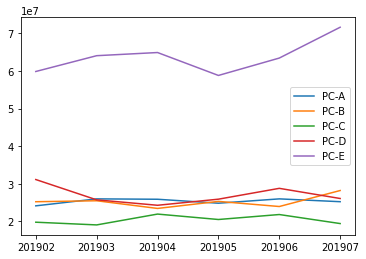

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(graph_data.index), graph_data['PC-A'], label='PC-A')
plt.plot(list(graph_data.index), graph_data['PC-B'], label='PC-B')
plt.plot(list(graph_data.index), graph_data['PC-C'], label='PC-C')
plt.plot(list(graph_data.index), graph_data['PC-D'], label='PC-D')
plt.plot(list(graph_data.index), graph_data['PC-E'], label='PC-E')
plt.legend()

- 가로축은 payment_month를 표시해야하므로 graph_index를 리스트형으로 변환해서 지정했다.
- 세로축은 상품별 매출이므로 graph_data 칼럼을 지정했다.
- label로 범례를 표시한다.

### Matplotlib 기본 사용

기본 그래프 그리기 - 예제 1
- plot() 함수는 리스트의 값들이 y 값들이라고 가정하고, x 값 [0, 1, 2, 3]을 자동으로 만들어낸다.
- show() 함수는 그래프를 화면에 나타나도록 한다.

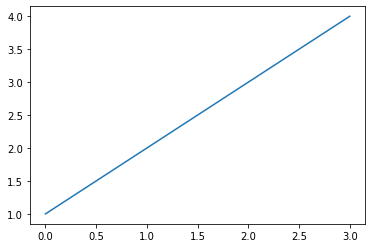

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4])
plt.show()

기본 그래프 그리기 - 예제 2
- plot() 함수는 임의의 개수의 인자를 받을 수 있다. 아래와 같이 입력하면 x-y 값을 그래프로 나타낼 수 있다.

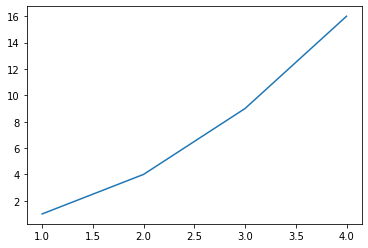

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

스타일 지정하기
- x, y 값 인자에 대해 선의 색상과 형태를 지정한느 포멧 문자열(Format string)을 세번째 인자에 입력할 수 있다.
- ro는 빨간색(red)의 원형(o) 마커를 의미한다.
- b-는 blue의 실선(-)을 의미한다.

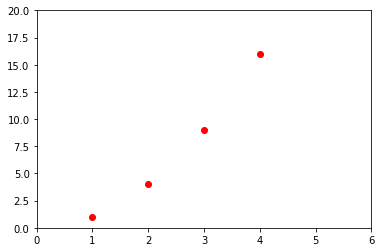

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

여러 개의 그래프 그리기
- Matplotlib에서는 일반적으로 NumPy 어레이를 사용한다. Numpy 어레이를 사용하지 않더라도 내부적으로 Numpy 어레이로 변환된다.

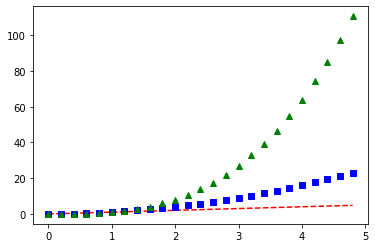

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 200ms 간격으로 균일하게 샘플된 시간
t = np.arange(0., 5., 0.2)

# 빨간 대쉬, 파란 사각형, 녹색 삼각형
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### Matplotlib 범례 표시
- 그래프 영역에 범례를 나타내기 위해서는 plot() 함수에 label 문자열을 지정하고, legend() 함수를 호출한다.

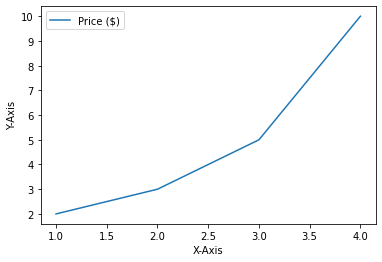

In [ ]:
plt.plot([1, 2, 3, 4], [2, 3, 5, 10], label='Price ($)')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.legend()

plt.show()